<a href="https://colab.research.google.com/github/suryarout1261/Solar_panel/blob/main/SOLAR_PANEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/dataset.csv')

In [ ]:
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [ ]:
df.shape

(4213, 21)

In [ ]:
numerical_data = df.select_dtypes(include=[np.number]).columns

In [ ]:
print(numerical_data)

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='object')


In [ ]:
non_numerical_data = df.select_dtypes(include='object').columns

In [ ]:
print(non_numerical_data)

Index([], dtype='object')


In [ ]:
df.isnull().sum()

,0
temperature_2_m_above_gnd,0
relative_humidity_2_m_above_gnd,0
mean_sea_level_pressure_MSL,0
total_precipitation_sfc,0
snowfall_amount_sfc,0
total_cloud_cover_sfc,0
high_cloud_cover_high_cld_lay,0
medium_cloud_cover_mid_cld_lay,0
low_cloud_cover_low_cld_lay,0
shortwave_radiation_backwards_sfc,0


<Axes: xlabel='generated_power_kw', ylabel='Count'>

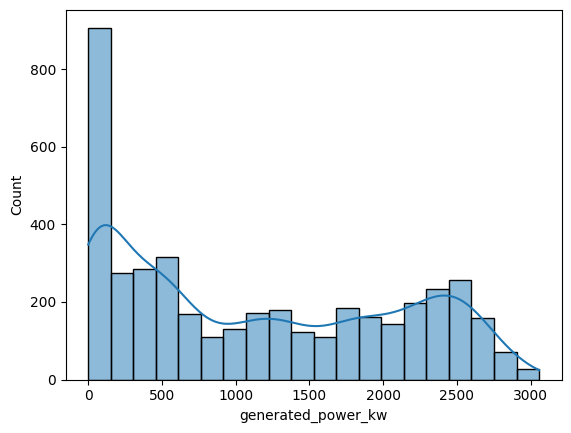

In [ ]:
sns.histplot(df['generated_power_kw'],bins=20,kde=True)

In [ ]:
X = df.drop('generated_power_kw', axis=1)
Y = df['generated_power_kw']

In [ ]:
model = LinearRegression()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y , test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3370, 20)
(843, 20)
(3370,)
(843,)


In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
trained_pred = model.predict(x_train)

In [ ]:
training_accuracy = r2_score(y_train,trained_pred)
print(training_accuracy)

0.7029856256536771


In [ ]:
test_pred = model.predict(x_test)

In [ ]:
test_accuracy = r2_score(y_test,test_pred)
print(test_accuracy)

0.7180084563489011


In [ ]:
df.iloc[6:7,1:]

,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,wind_speed_10_m_above_gnd,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
6,27,1034.0,0.0,0.0,0.0,0,0,0,469.92,5.96,25.02,6.61,29.36,6.44,26.57,12.96,36.197514,70.351498,211.21422,2270.3207


In [ ]:
list = [6.73	,58,	1026.1,	0.0	,0.0	,15.0	,50	,0	,0	,430.76,	29.48,	8.43,	33.56	,9.26	,29.48	,8.43	,38.16	,59.907233	,52.383087	,97.270336]
reshaped_array = np.array(list).reshape(1, -1)
print(reshaped_array)


[[   6.73       58.       1026.1         0.          0.         15.
    50.          0.          0.        430.76       29.48        8.43
    33.56        9.26       29.48        8.43       38.16       59.907233
    52.383087   97.270336]]


In [ ]:

val = model.predict(reshaped_array)
print(val)
print(df['generated_power_kw'][1444])
if(val == df['generated_power_kw'][1444]):
  print("True")
else:
  print("False")

[1609.59284186]
2017.5687
False


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
filtered_df = df[df['angle_of_incidence'] == max(df['angle_of_incidence'])]
print(filtered_df)

     temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
280                       1.31                               69   

     mean_sea_level_pressure_MSL  total_precipitation_sfc  \
280                       1005.6                      0.1   

     snowfall_amount_sfc  total_cloud_cover_sfc  \
280                 0.07                  100.0   

     high_cloud_cover_high_cld_lay  medium_cloud_cover_mid_cld_lay  \
280                              0                              52   

     low_cloud_cover_low_cld_lay  shortwave_radiation_backwards_sfc  ...  \
280                          100                             130.83  ...   

     wind_direction_10_m_above_gnd  wind_speed_80_m_above_gnd  \
280                         321.34                      47.81   

     wind_direction_80_m_above_gnd  wind_speed_900_mb  wind_direction_900_mb  \
280                         322.96              36.55                 320.19   

     wind_gust_10_m_above_gnd  angle_of_incidence    

TypeError: You have to supply one of 'by' and 'level'